## Logistic regression, model on customer churn binary classification

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [71]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


#### Data cleaning

In [72]:
# Checking the data types to see if they are correct.

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
# I should change the data for column TotalCharges, object to float.

churnData["TotalCharges"] =  pd.to_numeric(churnData["TotalCharges"], errors='coerce')

In [74]:
# Checking if there are missing values in the dataframe.

churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [75]:
# I will replace the missing values.

TotalChargesMean = round(churnData["TotalCharges"].mean(), 4)

churnData["TotalCharges"] = churnData["TotalCharges"].fillna(TotalChargesMean)

In [76]:
# The target variable is churn. I will replace the current values to No-->0 and Yes-->1.

churnData["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [77]:
churnData["Churn"] = churnData["Churn"].replace(["No"],"0")
churnData["Churn"] = churnData["Churn"].replace(["Yes"],"1")
churnData["Churn"] =  pd.to_numeric(churnData["Churn"], errors='coerce')

In [78]:
churnData["Churn"].unique()

array([0, 1])

#### Scaling and modeling

In [79]:
# Taking the columns I will use in scaling and x/y splitting.

scalingData = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges", "Churn"]]

In [80]:
scalingData

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [81]:
# X/y splitting

X = scalingData.drop("Churn", axis = 1)
y = scalingData["Churn"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [83]:
# I will use standardscaler for the data. 
# I will fit it using train set and then apply this fit to both, train set and test set.

std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.794462,0.780696
1,Precision,0.655240,0.661597
2,Recall,0.453559,0.441624


Confusion matrix for the train set
[[3807  352]
 [ 806  669]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


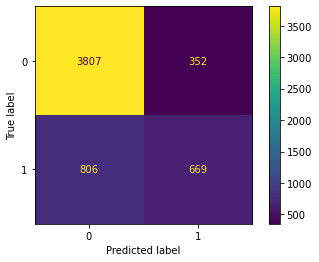



Confusion matrix for the test set
[[926  89]
 [220 174]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


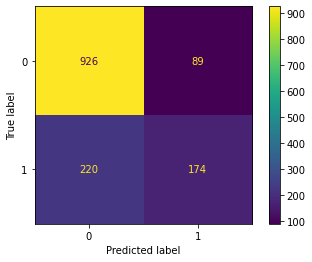

In [65]:
log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [66]:
# From the model metrics: 

# Accuracy is pretty good. 79% of the data is correctly predicted.
# Precision is 65%. 65% of all of the predicted positive records were really positive. Not so good result.
# Recall is 45%. 45% of all the really positive records were predicted to be positive. Quite bad result.

#### KNN model

,Error_metric,Train,Test
0,Accuracy,0.84,0.78
1,Precision,0.73,0.62
2,Recall,0.59,0.52


Confusion matrix for the train set
[[3833  326]
 [ 603  872]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


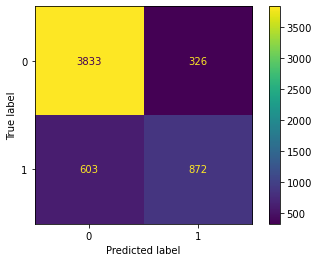



Confusion matrix for the test set
[[888 127]
 [189 205]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


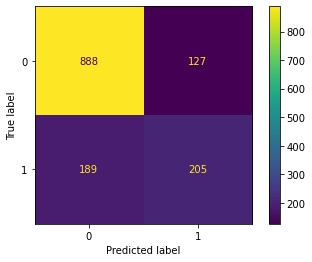

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_train_log = knn_model.predict(X_train_scaled)
y_pred_test_log = knn_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [118]:
# Another way of computing.

# from sklearn.metrics import classification_report

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html